In [1]:
# Silent warnings
import warnings
warnings.filterwarnings('ignore')

# Let's import the libraries.
import numpy as np, pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.optimize import minimize
import scipy.stats as stats
import statsmodels.api as sm
%matplotlib inline


In [4]:
# Let's now generate the data using numpy.
N = 100
x = np.linspace(0,20,N)
ϵ = np.random.normal(loc = 0.0, scale = 5.0, size = N)
y = 3*x + ϵ

# Dump into a pandas DataFrame
df = pd.DataFrame({'y':y, 'x':x})
df['constant'] = 1

df.head(10)

,y,x,constant
0,-6.401633,0.000000,1
1,0.922285,0.202020,1
2,-7.526482,0.404040,1
3,12.296473,0.606061,1
4,3.545596,0.808081,1
5,4.148581,1.010101,1
6,6.446740,1.212121,1
7,5.245854,1.414141,1
8,1.849814,1.616162,1
9,7.179595,1.818182,1


In [3]:
# Lets now inspect oue dataset.
df.head(10)

,y,x,constant
0,0.558956,0.000000,1
1,3.473951,0.202020,1
2,4.045983,0.404040,1
3,1.092658,0.606061,1
4,5.346300,0.808081,1
5,3.774997,1.010101,1
6,8.496405,1.212121,1
7,9.876847,1.414141,1
8,14.545586,1.616162,1
9,3.704332,1.818182,1


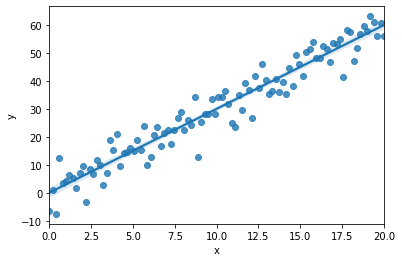

In [5]:
# Now we'll plot the data and fit a regression line.
# confidence intervals are also displayed
sns.regplot(df.x, df.y);

In [6]:
# Let's split features and target
X = df[['constant', 'x']]

# We'll now fit model and summarize the data.
sm.OLS(y,X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     1371.
Date:                Sun, 01 Aug 2021   Prob (F-statistic):           2.02e-59
Time:                        22:45:12   Log-Likelihood:                -296.13
No. Observations:                 100   AIC:                             596.3
Df Residuals:                      98   BIC:                             601.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant       0.0409      0.938      0.044      0.965      -1.820       1.901
x              2.9989      0.081     37.028      0.000       2.838       3.160
==============================================================================
Omnibus:                        4.920   Durbin-Watson:                   2.214
Prob(Omnibus):                  0.085   Jarque-Bera (JB):                4.508
Skew:                          -0.516   Prob(JB):                        0.105
Kurtosis:                       3.133   Cond. No.                         23.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
# Now we'll define a likelihood function.
def MLERegression(params):
    intercept, beta, sd = params[0], params[1], params[2] # inputs are guesses at our parameters
    yhat = intercept + beta*x # predictions
    
    # next, we'll flip the Bayesian question
    # compute PDF of observed values normally distributed around mean with a standard deviation of sd.
    negLL = -np.sum( stats.norm.logpdf(y, loc=yhat, scale=sd) )
    
    # return negative LL
    return(negLL)

In [12]:
# Let’s now start with some random coefficient guesses and optimize
guess = np.array([5,5,2])

results = minimize(MLERegression, guess, method = 'Nelder-Mead', options={'disp': True})

Optimization terminated successfully.
         Current function value: 296.127058
         Iterations: 106
         Function evaluations: 194


In [9]:
results # this gives us verbosity around our minimization
# notice our final key and associated values

 final_simplex: (array([[0.04086366, 2.99887439, 4.67545999],
       [0.04091988, 2.99887033, 4.67550183],
       [0.04079271, 2.99887747, 4.6754922 ],
       [0.04078354, 2.99888233, 4.6755086 ]]), array([296.12705838, 296.12705838, 296.12705838, 296.12705839]))
           fun: 296.1270583799054
       message: 'Optimization terminated successfully.'
          nfev: 194
           nit: 106
        status: 0
       success: True
             x: array([0.04086366, 2.99887439, 4.67545999])

In [14]:
# Finally, we'll drop results into df and round to match statsmodels.
resultsdf = pd.DataFrame({'coef':results['x']})
resultsdf.index=['constant','x','sigma']   
np.round(resultsdf.head(2), 4)

,coef
constant,0.0409
x,2.9989
